In [1]:
import pandas as pd
import pymongo
import amz_local_search.analysis as az
from amz_local_search.config import get_config

In [103]:
def connect_to_mongo_db():
    mongo_uri = get_config().mongo_local_search_db_uri()
    client = pymongo.MongoClient(mongo_uri)
    return client.get_database()

mongo_db = connect_to_mongo_db()

In [177]:
query = 'carabiner clip'
asin = 'B0719B4LNH'

rank_iter = az._get_historical_data_iter(mongo_db, user_id=None, query=query, asin=asin)
rank_df = pd.DataFrame(rank_iter, columns=['date', 'state', 'rank', 'avail_msg', 'get_by_date'])
#rank_df.set_index(['date', 'state'], inplace=True, drop=False)

rank_df.to_csv('/Users/evgenyp/Dropbox/Temp/Study/history.csv')
rank_df.head(3)

,date,state,rank,avail_msg,get_by_date
0,2019-08-21,MI,1,None,2019-08-23
1,2019-08-21,CO,1,None,2019-08-23
2,2019-08-21,CA,1,None,2019-08-21


In [122]:
 rank_df.groupby('date')

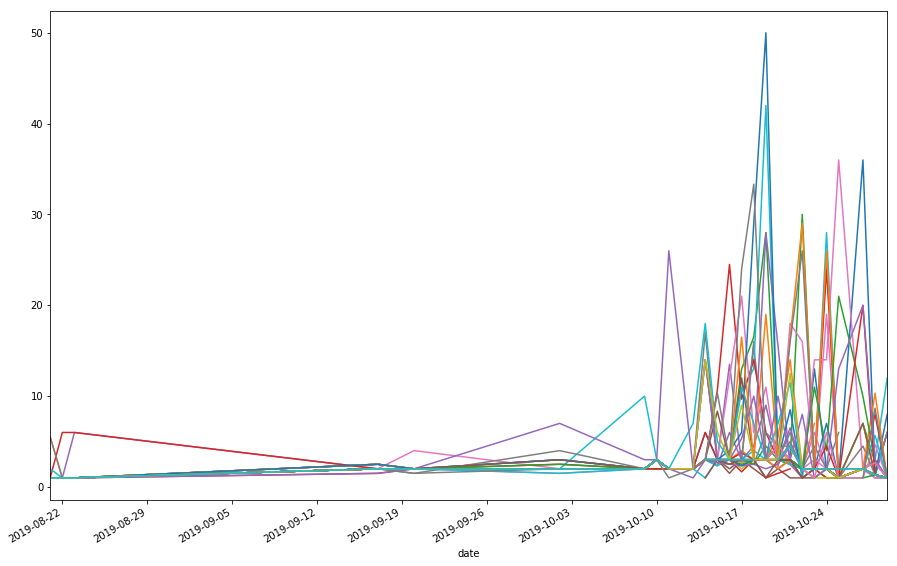

In [31]:
# rank_df['sma'] = rank_df['rank'].rolling(window=7).mean()
# rank_df

pivoted_rank_df = rank_df.pivot_table(index='date',
                                              columns='state',
                                              values='rank',
                                              aggfunc='mean')
pivoted_rank_df.plot(kind='line', figsize=(15,10), legend=False)

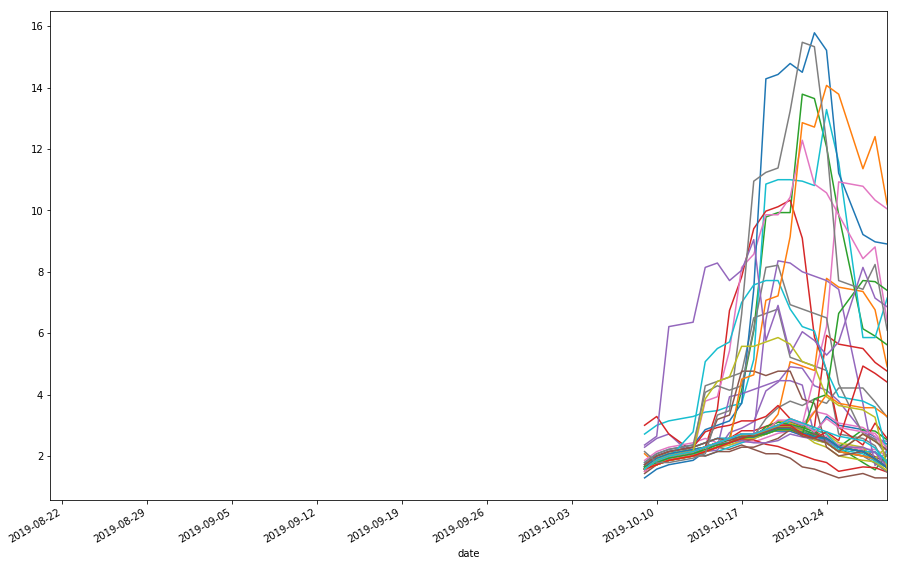

In [40]:
pivoted_rank_df.fillna(method='ffill').rolling(window=7).mean().plot(kind='line', figsize=(15,10), legend=False)

In [54]:
ranks_by_state = rank_df.groupby(['state'])

last_per_state = rank_df[rank_df['date'] ==
                                 ranks_by_state['date'].transform('max')]

agg_df = ranks_by_state.agg({'rank':
            ['mean', 'std', 'min', 'max', 'median'], 'get_by_date': {'get_by': 'last'}, 'avail_msg': {'avail_msg': 'last'}})
agg_df.columns = agg_df.columns.droplevel(0)
agg_df

,get_by,avail_msg,mean,std,min,max,median
state,,,,,,,
AK,2019-10-31,None,2.441176,1.133276,1,7,3.0
AL,2019-10-30,None,3.583333,5.698997,1,27,2.0
AR,2019-10-30,None,4.853659,8.507529,1,33,2.0
AZ,2019-10-30,None,2.219512,0.962086,1,5,2.0
CA,2019-10-30,None,3.052632,2.609208,1,11,2.0
CO,2019-10-30,None,2.195122,0.781649,1,3,2.0
CT,2019-10-30,None,2.184211,0.982420,1,6,2.0
DE,2019-10-30,None,3.297297,5.021426,1,28,2.0
FL,2019-10-30,None,2.263158,1.004966,1,6,2.0


In [63]:
pivoted_rank_df = rank_df.pivot_table(index='state',
                                              columns='date',
                                              values='rank',
                                              aggfunc='mean')
pivoted_rank_df

date,2019-08-21 00:00:00,2019-08-22 00:00:00,2019-08-23 00:00:00,2019-09-17 00:00:00,2019-09-20 00:00:00,2019-10-02 00:00:00,2019-10-09 00:00:00,2019-10-10 00:00:00,2019-10-11 00:00:00,2019-10-13 00:00:00,...,2019-10-19 00:00:00,2019-10-20 00:00:00,2019-10-21 00:00:00,2019-10-22 00:00:00,2019-10-23 00:00:00,2019-10-24 00:00:00,2019-10-25 00:00:00,2019-10-27 00:00:00,2019-10-28 00:00:00,2019-10-29 00:00:00
state,,,,,,,,,,,,,,,,,,,,,
AK,1.0,NaN,1.0,NaN,NaN,2.0,2.0,3.0,2.0,2.0,...,3.0,3.0,3.0,2.0,2.0,7.0,1.0,2.0,1.333333,NaN
AL,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,NaN,...,3.0,5.5,14.0,2.0,2.0,25.0,1.0,2.0,1.333333,1.0
AR,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,...,28.0,3.0,3.0,30.0,2.0,2.0,1.0,2.0,1.333333,1.0
AZ,1.0,1.0,1.0,1.5,2.0,2.0,2.0,3.0,2.0,2.0,...,3.0,3.0,3.0,2.0,2.0,2.0,1.0,2.0,1.333333,1.0
CA,1.0,1.0,6.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,...,9.0,3.0,6.5,2.0,2.0,2.0,NaN,2.0,1.333333,6.0
CO,1.0,1.0,1.0,2.5,2.0,2.0,2.0,3.0,2.0,2.0,...,3.0,3.0,2.5,2.0,2.0,2.0,2.0,2.0,1.333333,1.0
CT,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,...,3.0,3.0,2.5,2.0,3.0,2.0,1.0,2.0,3.000000,1.0
DE,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,...,3.0,3.0,6.0,2.0,2.0,2.0,1.0,2.0,1.333333,1.0
FL,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,...,3.0,3.0,3.0,2.0,2.0,2.0,1.0,2.0,1.333333,6.0


In [67]:
rank_df.groupby('date')['rank'].max()

date
2019-08-21    10
2019-08-22    11
2019-08-23    11
2019-09-17     3
2019-09-20     6
2019-10-02    12
2019-10-09    10
2019-10-10     3
2019-10-11    26
2019-10-13     7
2019-10-14    18
2019-10-15    26
2019-10-16    25
2019-10-17    33
2019-10-18    55
2019-10-19    50
2019-10-20    28
2019-10-21    30
2019-10-22    30
2019-10-23    14
2019-10-24    28
2019-10-25    36
2019-10-27    36
2019-10-28    24
2019-10-29    12
Name: rank, dtype: int64

In [76]:

#rank_df.groupby('date')['rank'].max().reindex()

date
2019-08-21    10
2019-08-22    11
2019-08-23    11
2019-09-17     3
2019-09-20     6
2019-10-02    12
2019-10-09    10
2019-10-10     3
2019-10-11    26
2019-10-13     7
2019-10-14    18
2019-10-15    26
2019-10-16    25
2019-10-17    33
2019-10-18    55
2019-10-19    50
2019-10-20    28
2019-10-21    30
2019-10-22    30
2019-10-23    14
2019-10-24    28
2019-10-25    36
2019-10-27    36
2019-10-28    24
2019-10-29    12
Name: rank, dtype: int64

In [79]:
for s, x in rank_df.groupby('date')['rank'].max().iteritems():
    print s, x
    

2019-08-21 00:00:00 10
2019-08-22 00:00:00 11
2019-08-23 00:00:00 11
2019-09-17 00:00:00 3
2019-09-20 00:00:00 6
2019-10-02 00:00:00 12
2019-10-09 00:00:00 10
2019-10-10 00:00:00 3
2019-10-11 00:00:00 26
2019-10-13 00:00:00 7
2019-10-14 00:00:00 18
2019-10-15 00:00:00 26
2019-10-16 00:00:00 25
2019-10-17 00:00:00 33
2019-10-18 00:00:00 55
2019-10-19 00:00:00 50
2019-10-20 00:00:00 28
2019-10-21 00:00:00 30
2019-10-22 00:00:00 30
2019-10-23 00:00:00 14
2019-10-24 00:00:00 28
2019-10-25 00:00:00 36
2019-10-27 00:00:00 36
2019-10-28 00:00:00 24
2019-10-29 00:00:00 12


In [88]:
for s, x in rank_df.groupby('date')['rank'].agg(['min', 'max', 'mean'])[['min', 'max']].iteritems():
    print s, x

min date
2019-08-21    1
2019-08-22    1
2019-08-23    1
2019-09-17    1
2019-09-20    1
2019-10-02    1
2019-10-09    2
2019-10-10    2
2019-10-11    1
2019-10-13    1
2019-10-14    1
2019-10-15    1
2019-10-16    1
2019-10-17    1
2019-10-18    1
2019-10-19    1
2019-10-20    1
2019-10-21    1
2019-10-22    1
2019-10-23    1
2019-10-24    1
2019-10-25    1
2019-10-27    1
2019-10-28    1
2019-10-29    1
Name: min, dtype: int64
max date
2019-08-21    10
2019-08-22    11
2019-08-23    11
2019-09-17     3
2019-09-20     6
2019-10-02    12
2019-10-09    10
2019-10-10     3
2019-10-11    26
2019-10-13     7
2019-10-14    18
2019-10-15    26
2019-10-16    25
2019-10-17    33
2019-10-18    55
2019-10-19    50
2019-10-20    28
2019-10-21    30
2019-10-22    30
2019-10-23    14
2019-10-24    28
2019-10-25    36
2019-10-27    36
2019-10-28    24
2019-10-29    12
Name: max, dtype: int64


In [92]:
x = rank_df.groupby('date')['rank'].agg(['min', 'max', 'mean'])

In [95]:
for z, g in x[['min', 'max']].iterrows():
    print z, g['min'], g['max']

2019-08-21 00:00:00 1 10
2019-08-22 00:00:00 1 11
2019-08-23 00:00:00 1 11
2019-09-17 00:00:00 1 3
2019-09-20 00:00:00 1 6
2019-10-02 00:00:00 1 12
2019-10-09 00:00:00 2 10
2019-10-10 00:00:00 2 3
2019-10-11 00:00:00 1 26
2019-10-13 00:00:00 1 7
2019-10-14 00:00:00 1 18
2019-10-15 00:00:00 1 26
2019-10-16 00:00:00 1 25
2019-10-17 00:00:00 1 33
2019-10-18 00:00:00 1 55
2019-10-19 00:00:00 1 50
2019-10-20 00:00:00 1 28
2019-10-21 00:00:00 1 30
2019-10-22 00:00:00 1 30
2019-10-23 00:00:00 1 14
2019-10-24 00:00:00 1 28
2019-10-25 00:00:00 1 36
2019-10-27 00:00:00 1 36
2019-10-28 00:00:00 1 24
2019-10-29 00:00:00 1 12


In [115]:
rank_df['rank'] = rank_df.groupby(['state', 'date'])['rank'].fillna(method='ffill').reset_index()

In [117]:
rank_df

,date,state,rank,avail_msg,get_by_date
0,2019-08-21,MI,1,None,2019-08-23
1,2019-08-21,CO,1,None,2019-08-23
2,2019-08-21,CA,1,None,2019-08-21
3,2019-08-21,VA,1,None,2019-08-22
4,2019-08-21,FL,1,None,2019-08-22
5,2019-08-21,NJ,1,None,2019-08-22
6,2019-08-21,MD,1,None,2019-08-22
7,2019-08-21,CO,1,None,2019-08-23
8,2019-08-21,TN,1,None,2019-08-22
9,2019-08-21,CT,1,None,2019-08-22


In [132]:
rank_df.groupby(['state', 'date'])['rank']  #['rank'].fillna(method='ffill')

In [203]:
x = pd.DataFrame({
    'state': ['WA', 'NY', 'WA', 'NY', 'WA', 'NY', 'WA', 'NY', 'WA', 'NY'],
    'date': ['12-18-2019', '12-18-2019', '12-17-2019', '12-17-2019', '12-16-2019', '12-16-2019', '12-15-2019', '12-15-2019', '12-14-2019', '12-14-2019'],    
    'rank': [None, None, 5, 7, None, None, 1, 2, 3, None]
})
x

,date,rank,state
0,12-18-2019,NaN,WA
1,12-18-2019,NaN,NY
2,12-17-2019,5.0,WA
3,12-17-2019,7.0,NY
4,12-16-2019,NaN,WA
5,12-16-2019,NaN,NY
6,12-15-2019,1.0,WA
7,12-15-2019,2.0,NY
8,12-14-2019,3.0,WA
9,12-14-2019,NaN,NY


In [204]:
x.groupby(['state', 'date']).apply(pd.DataFrame.sort_values, 'date')['rank'].fillna(method='ffill')

state  date         
NY     12-14-2019  9    NaN
       12-15-2019  7    2.0
       12-16-2019  5    2.0
       12-17-2019  3    7.0
       12-18-2019  1    7.0
WA     12-14-2019  8    3.0
       12-15-2019  6    1.0
       12-16-2019  4    1.0
       12-17-2019  2    5.0
       12-18-2019  0    5.0
Name: rank, dtype: float64

In [160]:
x['rank_2'] = x.groupby(['state', 'date']).apply(pd.DataFrame.sort_values, 'date')['rank'].fillna(method='ffill')
x

TypeError: incompatible index of inserted column with frame index

In [170]:
x.groupby(['state'])['rank'].apply(lambda s: s.sort_values('date').fillna(method='ffill'))

ValueError: No axis named date for object type <type 'type'>

In [186]:
x['rank'] = x.sort_values('date').groupby(['state'])['rank'].fillna(method='ffill')
x

,date,rank,state,rank_2
0,12-16-2019,1.0,WA,1.0
1,12-16-2019,2.0,NY,2.0
2,12-15-2019,1.0,WA,1.0
3,12-15-2019,2.0,NY,2.0
4,12-14-2019,3.0,WA,3.0
5,12-14-2019,NaN,NY,NaN


In [192]:
rank_df = pd.read_csv('/tmp/debug.csv')
rank_df[rank_df.state=='OH'].head(100)

,Unnamed: 0,date,state,rank,avail_msg,get_by_date
15,15,2019-10-09,OH,16,NaN,2019-10-10
117,117,2019-10-11,OH,4,NaN,2019-10-12
118,118,2019-10-11,OH,5,NaN,2019-10-12
160,160,2019-10-13,OH,1,NaN,2019-10-14
250,250,2019-10-15,OH,9,NaN,2019-10-16
306,306,2019-10-15,OH,1,NaN,2019-10-16
361,361,2019-10-16,OH,1,NaN,2019-10-17
387,387,2019-10-17,OH,2,NaN,2019-10-17


In [193]:
rank_df['rank'] = rank_df.sort_values('date').groupby(
            ['state'])['rank'].fillna(method='ffill')
rank_df[rank_df.state=='OH'].head(100)

,Unnamed: 0,date,state,rank,avail_msg,get_by_date
15,15,2019-10-09,OH,16,NaN,2019-10-10
117,117,2019-10-11,OH,4,NaN,2019-10-12
118,118,2019-10-11,OH,5,NaN,2019-10-12
160,160,2019-10-13,OH,1,NaN,2019-10-14
250,250,2019-10-15,OH,9,NaN,2019-10-16
306,306,2019-10-15,OH,1,NaN,2019-10-16
361,361,2019-10-16,OH,1,NaN,2019-10-17
387,387,2019-10-17,OH,2,NaN,2019-10-17


In [198]:
pivoted_rank_df = rank_df.pivot_table(index='state',
                                              columns='date',
                                              values='rank',
                                              aggfunc='mean')
pivoted_rank_df

date,2019-10-09,2019-10-10,2019-10-11,2019-10-13,2019-10-14,2019-10-15,2019-10-16,2019-10-17
state,,,,,,,,
AK,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000
AL,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.000000
AR,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.000000
AZ,1.0,1.0,1.0,1.0,10.0,4.5,NaN,2.500000
CA,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.000000
CO,1.0,1.0,1.0,NaN,1.0,1.0,1.0,2.000000
CT,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000
DE,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.500000
FL,1.0,7.0,1.0,1.0,1.0,1.0,1.0,1.000000


In [199]:
pivoted_rank_df.ffill(axis=1)

date,2019-10-09,2019-10-10,2019-10-11,2019-10-13,2019-10-14,2019-10-15,2019-10-16,2019-10-17
state,,,,,,,,
AK,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000
AL,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.000000
AR,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.000000
AZ,1.0,1.0,1.0,1.0,10.0,4.5,4.5,2.500000
CA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
CO,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000
CT,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000
DE,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.500000
FL,1.0,7.0,1.0,1.0,1.0,1.0,1.0,1.000000
